In [183]:
def demo_func(x):
    return x[0] ** 2 + (x[1] - 0.05) ** 2 + x[2] ** 2

demo_func([-1,-1,-1]),demo_func([0,0,0])

(3.1025, 0.0025000000000000005)

#### 快速模拟退火

best_x: [0. 0. 0.] best_y: 0.0025000000000000005 y_history: 58 57


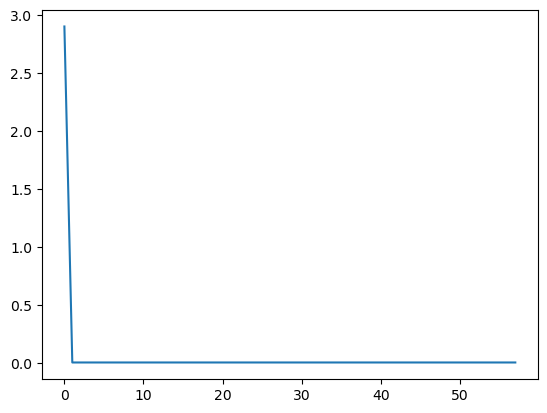

In [181]:
from sko.SA import SAFast
import matplotlib.pyplot as plt
import pandas as pd


sa = SAFast(func=demo_func
        , x0=[1, 1, 1] # 初始x解，初始解越大则越难到达最小值,越小则越容易错过
        , T_max=1 #系统的温度，系统初始应该要处于一个高温的状态 初始温度越高，且马尔科夫链越长，算法搜索越充分，得到全局最优解的可能性越大，但这也意味着需要耗费更多的计算时间
        , T_min=1e-9  #温度的下限，若温度T达到T_min，则停止搜索
        , L=300 #最大迭代次数,每个温度下的迭代次数（又称链长）
        , max_stay_counter=100 # 最大冷却停留计数器，保证快速退出,如果 best_y 在最大停留计数器次数（也称冷却时间）内保持不变，则停止运行
        ,lb = [-1,-1,-1] #x的下限
        ,ub = [0,0,0] #x的上限
        #,hop = [3,2,1] # x 的上下限最大差值 hop=ub-lb 
        ,m = 1 # 0-正无穷，越大，越容易冷却退出
        ,n = 1 # # 0-正无穷，越大，越不容易冷却退出
        ,quench = 1 # 淬火指数，0-正无穷，越小则越慢，但是越能求出最小，越大则越快，但是容易陷入局部最优
       )
best_x, best_y = sa.run()
print('best_x:', best_x, 'best_y:', best_y,"y_history:",len(sa.best_y_history),sa.iter_cycle)
plt.plot(pd.DataFrame(sa.best_y_history).cummin(axis=0))
plt.show()

#### 纯数值模拟退火

best_x: [-1.41017221e-05  4.99975687e-02 -2.01453477e-06] best_y: 2.0882800195555146e-10 y_history: 60


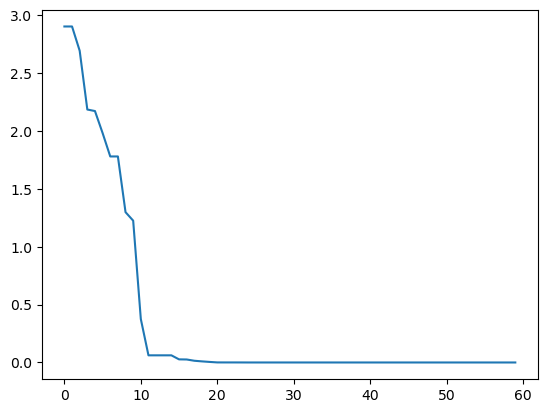

In [177]:
from sko.SA import SimulatedAnnealingValue
import matplotlib.pyplot as plt
import pandas as pd


sa = SimulatedAnnealingValue(func=demo_func
        , x0=[1, 1, 1] # 初始x解，初始解越大则越难到达最小值,越小则越容易错过
        , T_max=1 #系统的温度，系统初始应该要处于一个高温的状态 初始温度越高，且马尔科夫链越长，算法搜索越充分，得到全局最优解的可能性越大，但这也意味着需要耗费更多的计算时间
        , T_min=1e-9  #温度的下限，若温度T达到T_min，则停止搜索
        , L=300 #最大迭代次数,每个温度下的迭代次数（又称链长）
        , max_stay_counter=100000 # 冷却停留计数器,如果 best_y 在最大停留计数器次数（也称冷却时间）内保持不变，则停止运行
        ,lb = [-1,1,-1] #x的下限
        ,ub = [2,3,4] #x的上限
        #,hop = [3,2,1] # x 的上下限最大差值 hop=ub-lb 
        ,learn_rate = 0.0001 # 学习率，用于控制降温的快慢 值越小T更新越快，退出越快
       )
best_x, best_y = sa.run()
print('best_x:', best_x, 'best_y:', best_y,"y_history:",len(sa.best_y_history))
plt.plot(pd.DataFrame(sa.best_y_history).cummin(axis=0))
plt.show()

#### 柯西模拟退火

best_x: [-3.63459361e-04  1.00000000e+00 -1.12949504e-04] best_y: 0.9025001448602975 y_history: 114


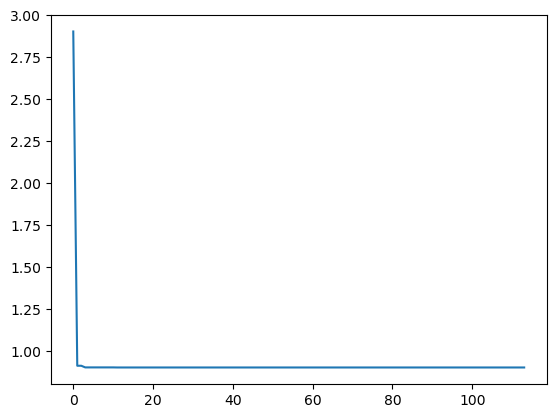

In [174]:
from sko.SA import SACauchy
import matplotlib.pyplot as plt
import pandas as pd


sa = SACauchy(func=demo_func
        , x0=[1, 1, 1] # 初始x解，初始解越大则越难到达最小值,越小则越容易错过
        , T_max=1 #系统的温度，系统初始应该要处于一个高温的状态 初始温度越高，且马尔科夫链越长，算法搜索越充分，得到全局最优解的可能性越大，但这也意味着需要耗费更多的计算时间
        , T_min=1e-9  #温度的下限，若温度T达到T_min，则停止搜索
        , L=300 #最大迭代次数,每个温度下的迭代次数（又称链长）
        , max_stay_counter=100 # 冷却停留计数器,如果 best_y 在最大停留计数器次数（也称冷却时间）内保持不变，则停止运行
        ,lb = [-1,1,-1] #x的下限
        ,ub = [2,3,4] #x的上限
        #,hop = [3,2,1] # x 的上下限最大差值 hop=ub-lb 
        ,learn_rate = 0.1 # 学习率，用于控制降温的快慢 值越大T更新越快，退出越快
       )
best_x, best_y = sa.run()
print('best_x:', best_x, 'best_y:', best_y,"y_history:",len(sa.best_y_history))
plt.plot(pd.DataFrame(sa.best_y_history).cummin(axis=0))
plt.show()

#### 玻尔兹曼模拟退火

best_x: [-0.00535198  0.05643076  0.00467344] best_y: 9.183949496215544e-05 y_history: 190


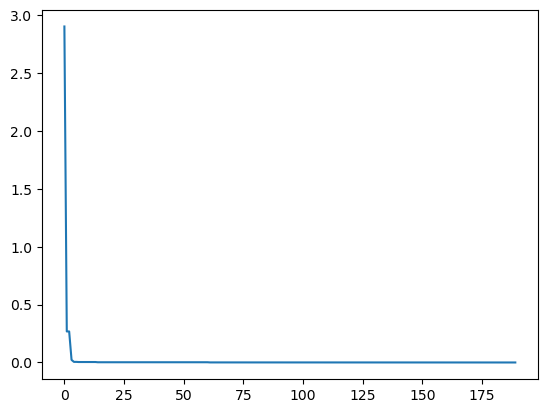

In [180]:
from sko.SA import SABoltzmann
import matplotlib.pyplot as plt
import pandas as pd


sa = SABoltzmann(func=demo_func
        , x0=[1, 1, 1] # 初始x解，初始解越大则越难到达最小值,越小则越容易错过
        , T_max=1 #系统的温度，系统初始应该要处于一个高温的状态 初始温度越高，且马尔科夫链越长，算法搜索越充分，得到全局最优解的可能性越大，但这也意味着需要耗费更多的计算时间
        , T_min=1e-9  #温度的下限，若温度T达到T_min，则停止搜索
        , L=300 #最大迭代次数,每个温度下的迭代次数（又称链长）
        , max_stay_counter=100 # 冷却停留计数器,如果 best_y 在最大停留计数器次数（也称冷却时间）内保持不变，则停止运行
        # ,lb = [-1,1,-1] #x的下限
        # ,ub = [2,3,4] #x的上限
        ,hop = [3,2,1] # x 的上下限最大差值 hop=ub-lb 
        ,learn_rate = 0.1 # 学习率，用于控制降温的快慢 值越大T更新越快，退出越快
       )
best_x, best_y = sa.run()
print('best_x:', best_x, 'best_y:', best_y,"y_history:",len(sa.best_y_history))
plt.plot(pd.DataFrame(sa.best_y_history).cummin(axis=0))
plt.show()